## Notebook Objectives

Summarize the Necessary Knowleadge to Apply Exploratory Data Analysis


### Agenda

[Business Questions](#Business-Questions)<br>

[Imports](#Imports)<br>
&emsp;[Functions](#Functions)<br>
&emsp;[Settings](#Settings)<br>

[Loading Data](#Loading-Data)<br>

[Feature Engineering](#Feature-Engineering)<br>

[Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
&emsp;[Summary Statistics](#Summary-Statistics)<br>
&emsp;[Missing Values](#Missing-Values)<br>

[Univariate Analysis](#Univariate-Analysis)<br>
&emsp;[Histograms](#Histograms)<br>
&emsp;[Box Plots](#Box-Plots)<br>
&emsp;[Bar Plots](#Bar-Plots)<br>

[Bivariate Analysis](#Bivariate-Analysis)<br>
&emsp;[Scatter Plots](#Scatter-Plots)<br>
&emsp;[Pair Plots](#Pair-Plots)<br>
&emsp;[Box Plots by Category](#Box-Plots-by-Category)<br>

[Multivariate Analysis](#Multivariate-Analysis)<br>
&emsp;[Correlation Heatmap](#Correlation-Heatmap)<br>
&emsp;[3D Scatter Plot](#3D-Scatter-Plot)<br>

[Data Distribution and Density](#Data-Distribution-and-Density)<br>
&emsp;[Denity Plots (KDE)](#Denity-Plots-(KDE))<br>
&emsp;[Hexbin Plots](#Hexbin-Plots)<br>

&emsp;[Summary and Insights](#Summary-and-Insights)<br>

## Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil

### Functions

In [20]:
def check_memory_usage():
    # Get memory usage in bytes
    memory = psutil.virtual_memory()

    # Total physical memory available
    total_memory = memory.total

    # Available physical memory
    available_memory = memory.available

    # Used physical memory
    used_memory = memory.used

    # Percentage of used memory
    memory_percent = memory.percent

    print(f"Total Memory: {total_memory} bytes")
    print(f"Available Memory: {available_memory} bytes")
    print(f"Used Memory: {used_memory} bytes")
    print(f"Memory Usage Percentage: {memory_percent}%")
check_memory_usage()


# def read_table(query, database):
#     '''
#     Lê tabela do Athena por meio de consulta SQL e retorna a tabela resultante.
    
#     query: Código SQL
#     database: Nome do Banco de dados
    
#     returns pandas.DataFrame com dados da consulta 
#     '''
#     return wr.athena.read_sql_query(sql=query, database=database)


def describe_data(data):
    """ Inform Data Dimension. Data Types. Count and % of NaN.

    :param data: pandas.DataFrame
    :return: pandas.DataFrame with columns=['data_types', 'nan_count', 'nan_percentage']
    """

    print(f"Shape: {data.shape}")
    try:
        print(f"Duplicates: {data.duplicated().any()}")
    except Exception as e:
        print(f"Error when searching for duplicates:\n\t{e}")

    is_na = data.isna().sum()
    is_na_percentage = is_na / data.shape[0] * 100
    nan_data_frame = pd.concat([data.dtypes, is_na, is_na_percentage], axis=1)
    nan_data_frame.columns = ['data_types', 'nan_count', 'nan_percentage']
    return nan_data_frame

Total Memory: 16849256448 bytes
Available Memory: 1683947520 bytes
Used Memory: 15165308928 bytes
Memory Usage Percentage: 90.0%


### Settings

In [12]:
pd.set_option("display.max_columns", None)

### Loading Data

In [4]:
# https://www.kaggle.com/datasets/jr2ngb/superstore-data
df_superstore = pd.read_csv("../data/superstore_dataset2011-2015.csv", encoding = "ISO-8859-1")
print(df_superstore.shape)
df_superstore.head(2)

(51290, 24)


Row ID       Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433   AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253  IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   

     Customer Name   Segment         City            State    Country  \
0  Toby Braunhardt  Consumer  Constantine      Constantine    Algeria   
1      Joseph Holt  Consumer  Wagga Wagga  New South Wales  Australia   

   Postal Code  Market   Region        Product ID         Category  \
0          NaN  Africa   Africa  OFF-TEN-10000025  Office Supplies   
1          NaN    APAC  Oceania   OFF-SU-10000618  Office Supplies   

  Sub-Category              Product Name    Sales  Quantity  Discount  \
0      Storage       Tenex Lockers, Blue  408.300         2       0.0   
1     Supplies  Acme Trimmer, High Speed  120.366         3       0.1   

    Profit  Shipping Cost Order Priority  
0  106.140          35.46         Medium  
1   36.036           9.72         Medium

## Feature Engineering

In [5]:
df_customer_abt = (
    df_superstore
        .groupby('Customer ID')
        .agg(
            total_sales=('Sales', 'sum'),
            avg_ticket=('Sales', 'mean'),
            total_products=('Quantity', 'sum'),
            avg_produtcs_per_purchase=('Quantity', 'mean'),
            median_discount=('Discount', 'median'),
            avg_discount=('Discount', 'mean'),
            std_discount=('Discount', 'std'),
            total_profit=('Profit', 'sum'),
            avg_profit=('Profit', 'mean'),
            total_shipping_cost=('Shipping Cost', 'sum'),
            avg_shipping_cost=('Shipping Cost', 'mean'),
            segment=('Segment','max'),
            market=('Market', lambda x: x.mode()[0]),
            most_used_ship_mode=('Ship Mode', lambda x: x.mode()[0])
        ).reset_index()
)
print(df_customer_abt.shape)
df_customer_abt.head(2)

(1590, 15)


Customer ID  total_sales  avg_ticket  total_products  \
0    AA-10315    13747.413  327.319357             145   
1    AA-10375     5884.195  140.099881             139   

   avg_produtcs_per_purchase  median_discount  avg_discount  std_discount  \
0                   3.452381              0.0      0.103571      0.159034   
1                   3.309524              0.0      0.166667      0.218271   

   total_profit  avg_profit  total_shipping_cost  avg_shipping_cost   segment  \
0      447.6905   10.659298              1236.15          29.432143  Consumer   
1      677.4774   16.130414               903.92          21.521905  Consumer   

  market most_used_ship_mode  
0     EU      Standard Class  
1     US         First Class

In [6]:
features = df_customer_abt.select_dtypes('number').columns
categories = df_customer_abt.select_dtypes(object).columns

## Exploratory Data Analysis

### Summary Statistics

We need it to **understand Data Distribution and Dispersion**.    

        Mean, median, and mode reveal central tendencies.
        standard deviation and variance show data spread.
        Skewness and kurtosis help identify asymmetry and tail behavior.

**Detect Outliers**: extreme values can heavily impact clustering results.    

**Feature Scaling and Normalization**: statistics like range and standard deviation guide whether scaling is necessary.

        Features on different scales can dominate the distance calculation, leading to biased clustering results.
        Or, if you identify variable with 0 variance you might decide to remove them from further analysis.

**Sparse Features:** where most of the values are zero (common in high-dimensional datasets). 

        Clusters may form based on the absence of certain attributes (the zeros) rather than the presence of meaningful attributes.
        This can result in clusters that are not meaningful or representative of actual patterns in the data 
        (so they might may not correspond to actual real-world segments).

In [9]:
df_customer_abt[features].describe().T

count         mean          std        min  \
total_sales                1590.0  7951.259063  6936.570172     7.1730   
avg_ticket                 1590.0   214.915028   104.991039     7.1730   
total_products             1590.0   112.145912    90.881731     1.0000   
avg_produtcs_per_purchase  1590.0     3.031905     0.935294     1.0000   
median_discount            1590.0     0.074127     0.165924     0.0000   
avg_discount               1590.0     0.154432     0.109474     0.0000   
std_discount               1583.0     0.207192     0.093313     0.0000   
total_profit               1590.0   922.929114  1328.397668 -6437.3681   
avg_profit                 1590.0    23.218680    43.825170  -511.7700   
total_shipping_cost        1590.0   850.830623   748.508224     0.8500   
avg_shipping_cost          1590.0    23.233848    12.776187     0.8500   

                                   25%          50%           75%  \
total_sales                1674.812250  6248.135590  13133.098420   
avg_ticket                  134.582758   214.507356    277.118073   
total_products               27.000000    77.000000    195.000000   
avg_produtcs_per_purchase     2.222222     3.311422      3.777778   
median_discount               0.000000     0.000000      0.100000   
avg_discount                  0.090920     0.136739      0.192385   
std_discount                  0.165235     0.202895      0.275003   
total_profit                 94.812000   591.357100   1614.486975   
avg_profit                    7.375106    24.614881     41.807361   
total_shipping_cost         172.617500   660.665000   1393.485000   
avg_shipping_cost            13.947625    22.499924     30.211071   

                                    max  
total_sales                35668.120800  
avg_ticket                   902.748000  
total_products               398.000000  
avg_produtcs_per_purchase     10.000000  
median_discount                0.700000  
avg_discount                   0.700000  
std_discount                   0.494975  
total_profit                8787.474900  
avg_profit                   334.134000  
total_shipping_cost         3593.080000  
avg_shipping_cost            131.441429

In [22]:
df_customer_abt[categories].describe().T

count unique             top  freq
Customer ID          1590   1590        AA-10315     1
segment              1590      3        Consumer   818
market               1590      7            EMEA   395
most_used_ship_mode  1590      4  Standard Class  1329

### Missing Values

We need to determine the extent and pattern of missing data to decide on appropriate handling methods.

        Remove or Impute (mean, median, machine learning imputation, business knowledge...)

In [14]:
describe_data(df_customer_abt)

Shape: (1590, 15)
Duplicates: False


data_types  nan_count  nan_percentage
Customer ID                   object          0        0.000000
total_sales                  float64          0        0.000000
avg_ticket                   float64          0        0.000000
total_products                 int64          0        0.000000
avg_produtcs_per_purchase    float64          0        0.000000
median_discount              float64          0        0.000000
avg_discount                 float64          0        0.000000
std_discount                 float64          7        0.440252
total_profit                 float64          0        0.000000
avg_profit                   float64          0        0.000000
total_shipping_cost          float64          0        0.000000
avg_shipping_cost            float64          0        0.000000
segment                       object          0        0.000000
market                        object          0        0.000000
most_used_ship_mode           object          0        0.000000

### Univariate Analysis

Visualize the frequency distribution of continuous variables. Identify skewness and outliers.

Skewed distributions can lead to biased clustering results, as the algorithm may be more influenced by the the extreme values rather than the majority of the data (it might require normalization)

Multimodal distributions can suggest the presence of natural subgroups within the data.

Outliers can significantly affect the centroids and boundaries of clusters. Clusters might be larger of smaller tant they should be, or certain clusters may contain outliers that do not represent their general characteristics.

#### Histograms

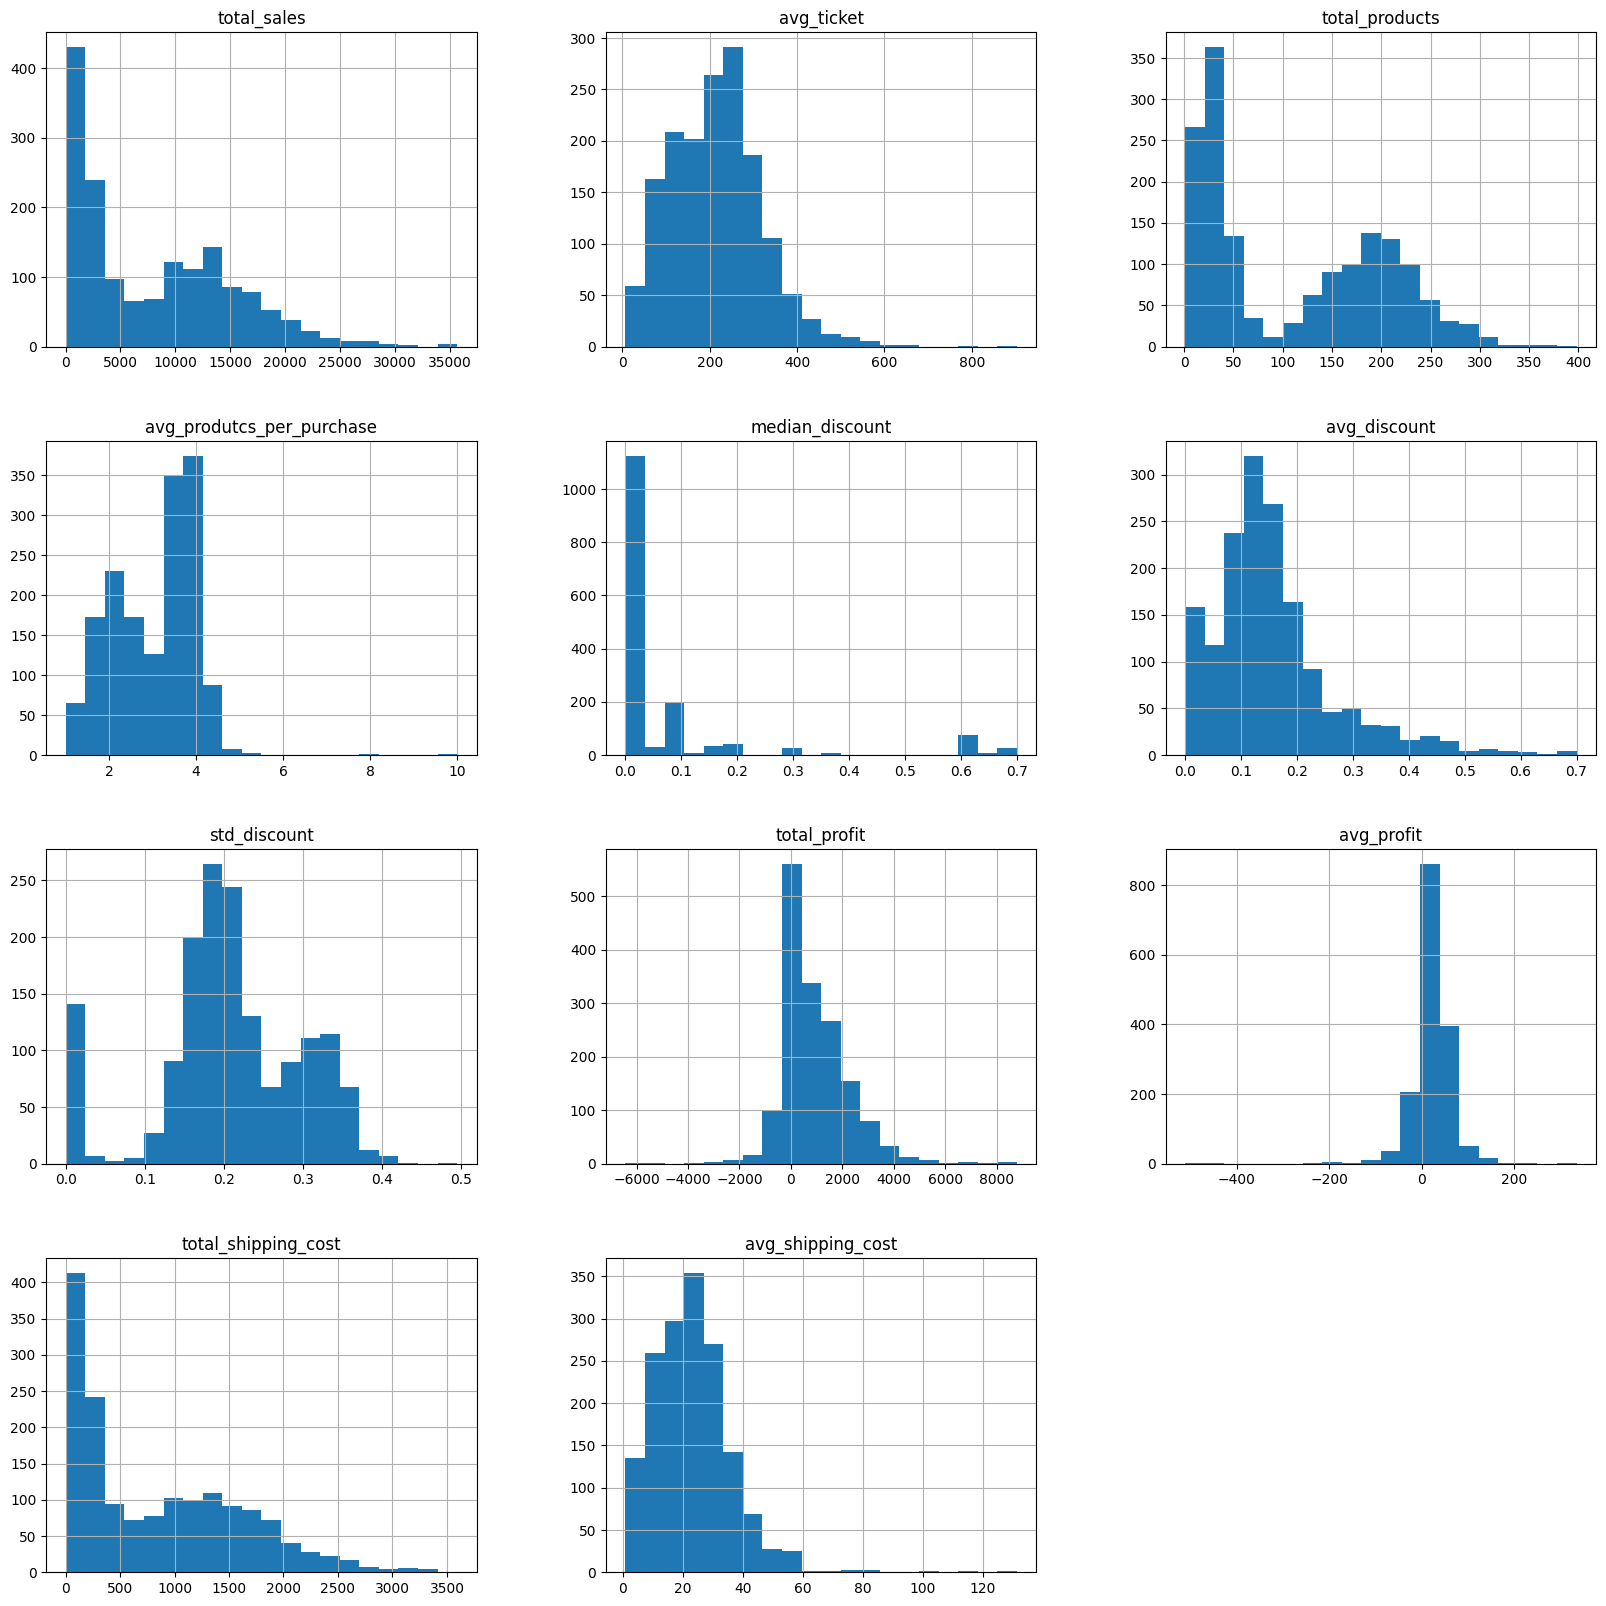

In [32]:
df_customer_abt[features].hist(bins=20, figsize=(20, 20))
plt.show()

#### Box Plots

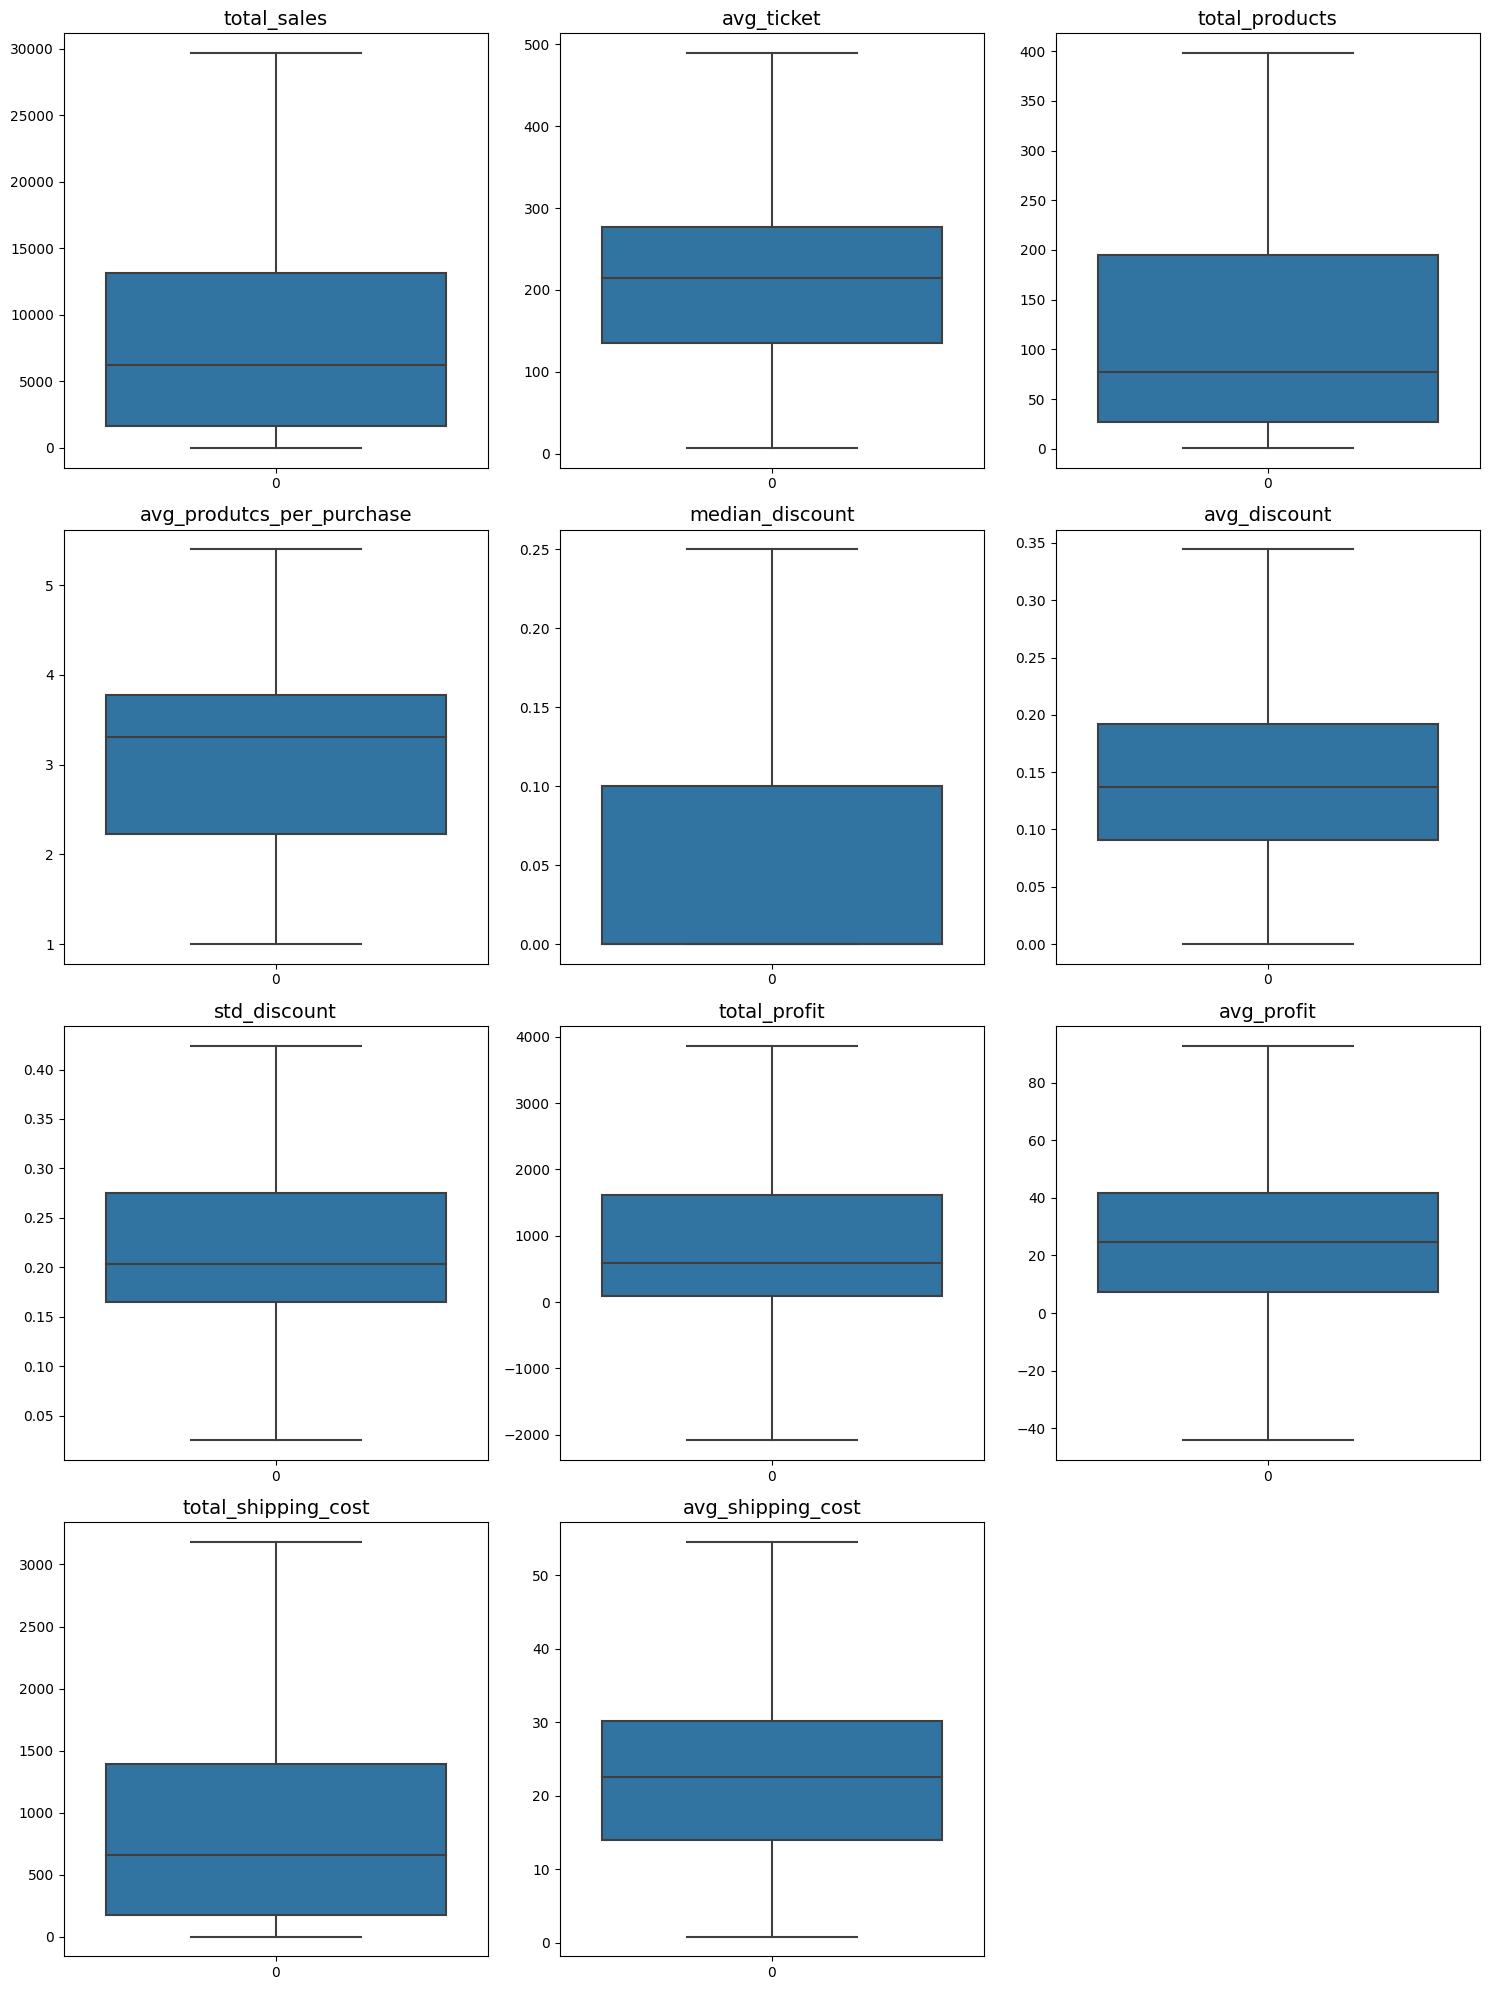

In [36]:
# Set up the plotting area for individual subplots
num_columns = 3
num_features = len(features)
num_rows = (num_features + num_columns - 1) // num_columns

plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.boxplot(data=df_customer_abt[feature], showfliers=False, orient='v')
    plt.title(f"{feature}", fontsize=14)

plt.tight_layout()
plt.show()

#### Bar Plots

Understand the frequency distribution of categorical variables.

If certain categories have very few observations, you might decide to merge them with other categories or remove them.

No PLot because of Unique Values for 'Customer ID' = 1590


C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

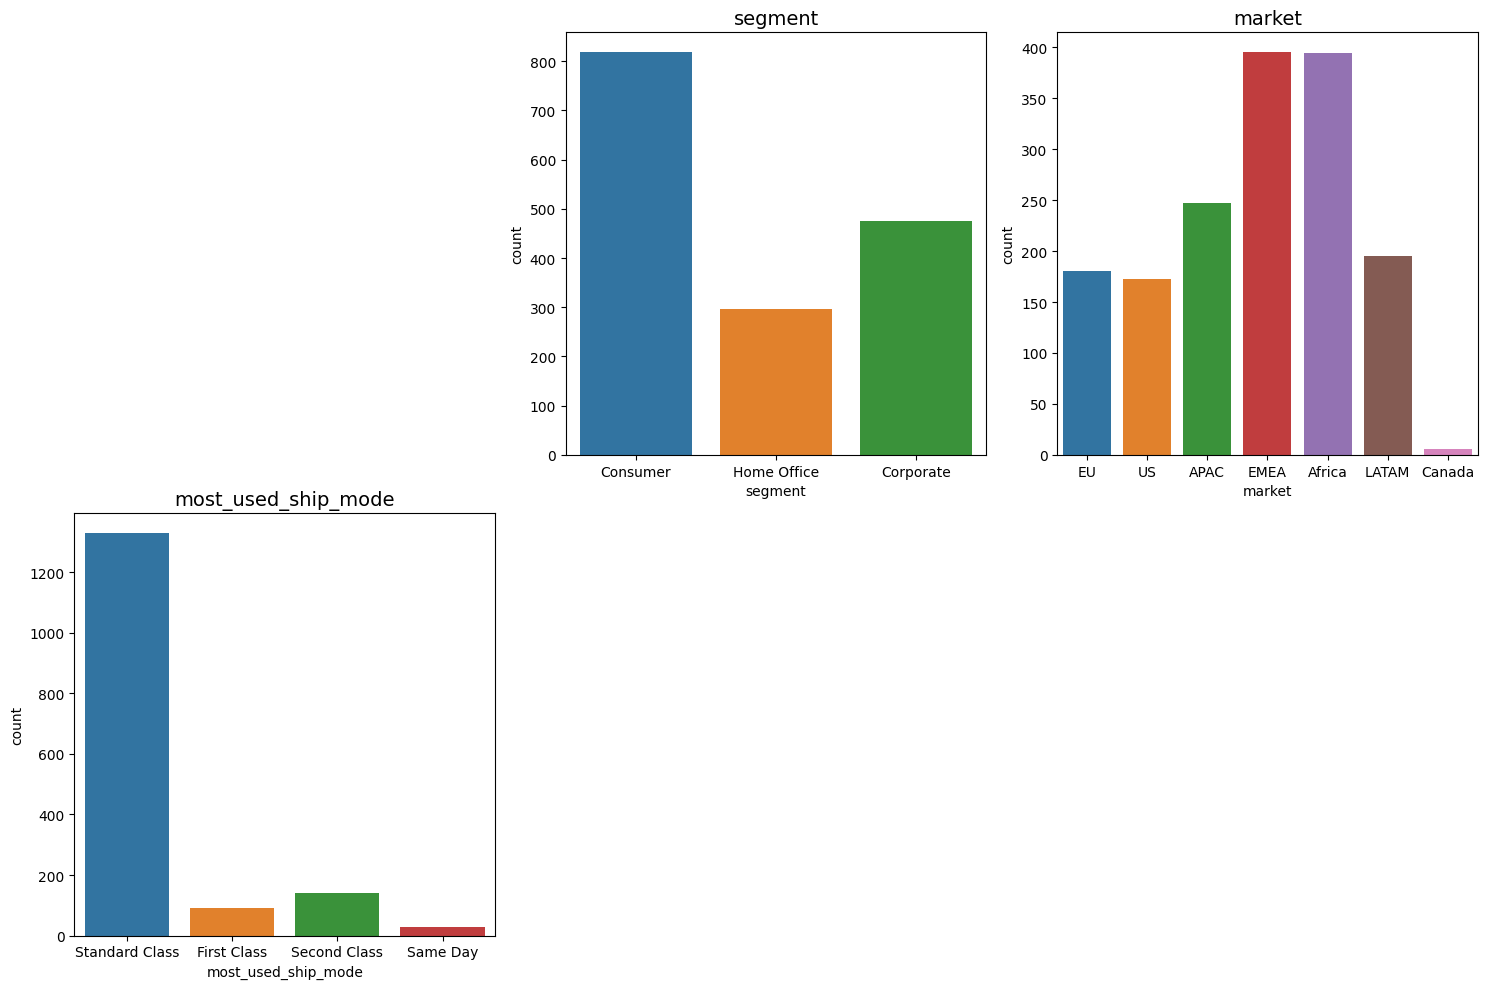

In [44]:
# Set up the plotting area for individual subplots
num_columns = 3
num_categories = len(categories)  # Use categories instead of features
num_rows = (num_categories + num_columns - 1) // num_columns

# Set the figure size
plt.figure(figsize=(15, num_rows * 5))

# Loop through each category and create a count plot
for i, category in enumerate(categories):
    if df_customer_abt[category].nunique() <= 10:
        plt.subplot(num_rows, num_columns, i + 1)
        sns.countplot(data=df_customer_abt, x=category)
        plt.title(f"{category}", fontsize=14)
    else:
        print(f"No PLot because of Unique Values for '{category}' = {df_customer_abt[category].nunique()}")
plt.tight_layout()
plt.show()

## Bivariate Analysis

Identify potential patterns, correlations, or dependencies between variables.   
Is there a natural grouping between multiple variables?

        "You are trying to see the clusters before they are formed"

        Clusters Centers: if centroids are identified K-means might be a good choice.
        Cluster Spread: evaluate spread/dispersion so that DBScan might be of use.

Each Cluster should form a distinct group with minimal overlap. Points within the same cluster should be close together.

        If clusters overlap significantly, you may need to reconsider your feature selection, normalization or clustering algorithm.


If variables show strong correlations, you might decide to remove one of them to reduce multicollinearity.


#### Scatter Plots

In [25]:
categories

Index(['Customer ID', 'segment', 'market', 'most_used_ship_mode'], dtype='object')

C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

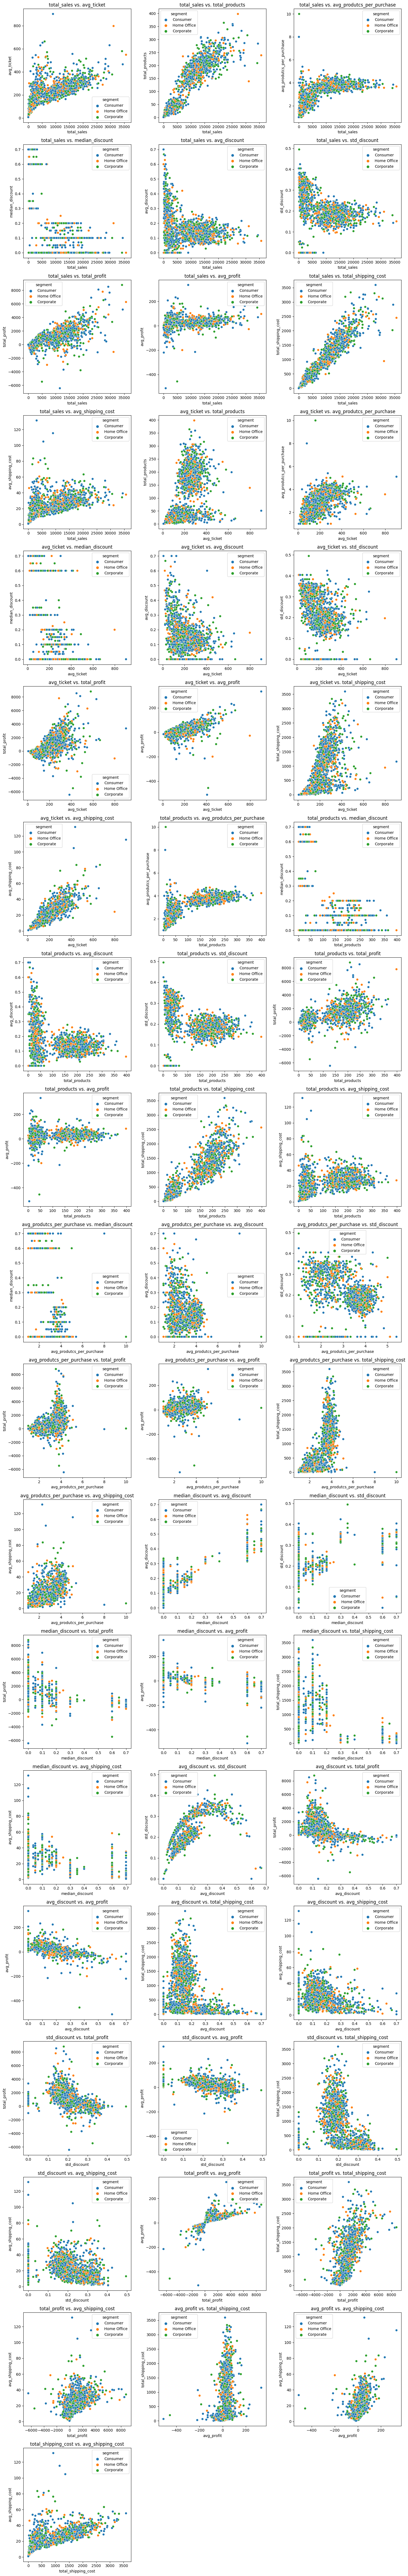

CPU times: total: 1.81 s
Wall time: 7.99 s


In [26]:
%%time
category = 'segment'

# Number of columns for the subplot grid
num_columns = 3
num_rows = (len(features) * (len(features) - 1) // 2 + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(15, num_rows * 5))

# Create a scatter plot for each pair of features
plot_index = 1
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.subplot(num_rows, num_columns, plot_index)
        sns.scatterplot(data=df_customer_abt, x=features[i], y=features[j], hue=category)
        plt.title(f'{features[i]} vs. {features[j]}')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plot_index += 1

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

#### Pair Plots

In [28]:
"Just Like The Previous Section"
# sns.pairplot(df_customer_abt[features], diag_kind='kde', plot_kws={'alpha': 0.5})   

'Just Like The Previous Section'

#### Box Plots by Category

If significant differences are observed betwee categories, you might decide to include the category in your model.

        "You're trying to see the clusters before they are formed. Difference between the boxes"
        Significant differences can indicate that the variable is useful for distinguishing between groups.

No PLot because of Unique Values for 'Customer ID' = 1590


C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

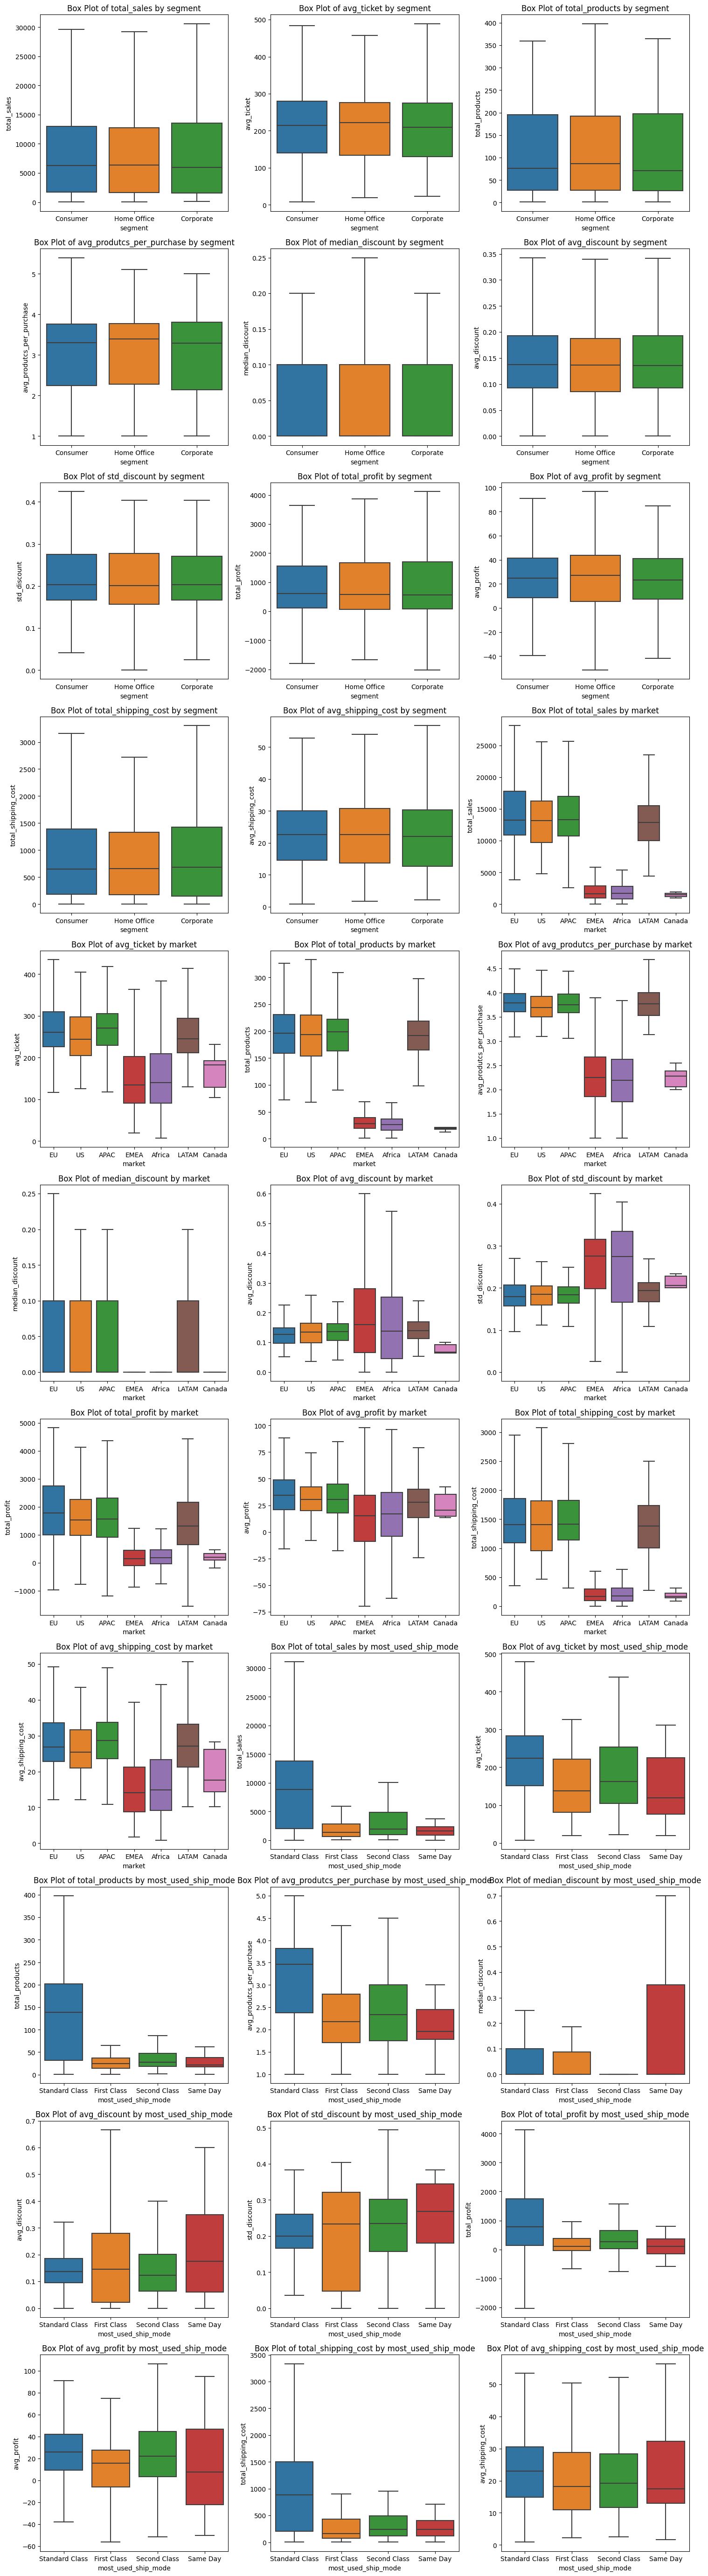

CPU times: total: 469 ms
Wall time: 3.08 s


In [39]:
%%time

# Set the number of columns for the subplot grid
num_columns = 3
num_plots = len(categories) * len(features)
num_rows = (num_plots + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(15, num_rows * 5))

# Plot index
plot_index = 1

# Create a box plot for each combination of categorical and continuous features
for category in categories:
    if df_customer_abt[category].nunique() <= 10:
        for feature in features:
            plt.subplot(num_rows, num_columns, plot_index)
            sns.boxplot(x=category, y=feature, data=df_customer_abt, showfliers=False)
            plt.title(f'Box Plot of {feature} by {category}')
            plt.xlabel(category)
            plt.ylabel(feature)
            plot_index += 1
    else:
        print(f"No PLot because of Unique Values for '{category}' = {df_customer_abt[category].nunique()}")

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

### Multivariate Analysis




#### Correlation Heatmap

Visualize the correlation matrix between multiple variables to identify strong and weak relationships.

High correlations may indicate redundancy (same information in two different variables), suggesting the use of dimensionality reduction techniques like PCA before clustering.


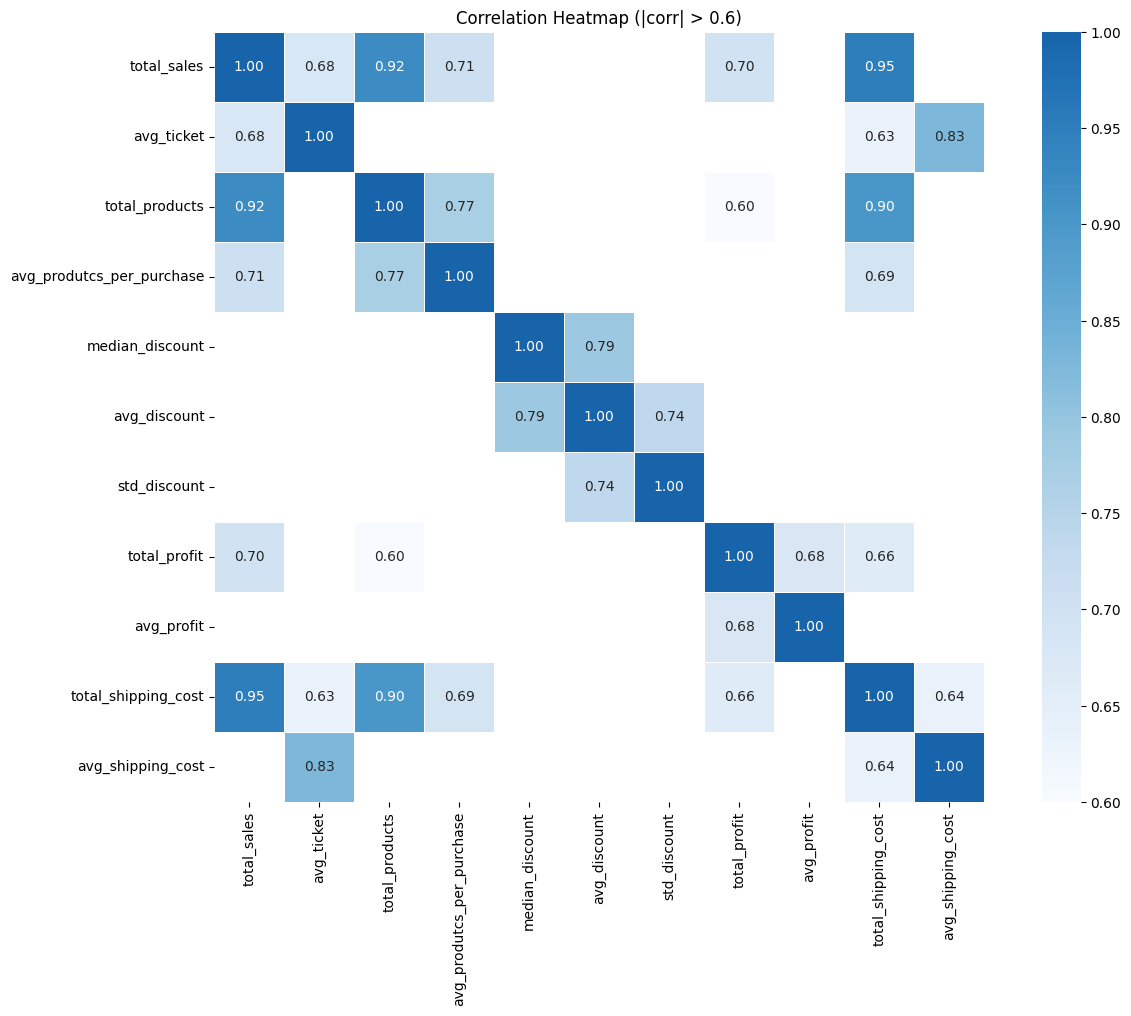

In [41]:
selected_features = features

# Calculate the correlation matrix
corr_matrix = df_customer_abt[selected_features].corr()

# Apply a mask to keep only correlations greater than...
mask = np.abs(corr_matrix) < 0.6
filtered_corr_matrix = corr_matrix.mask(mask)

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(filtered_corr_matrix, annot=True, cmap='Blues', vmin=0.6, vmax=1, center=0.85, cbar=True, square=True, fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap (|corr| > 0.6)')

# Show the plot
plt.show()

#### 3D Scatter Plot

Examine relationships between three continuous variables to identify patterns that may not be visible in 2D plots.

If clusters are observed in 3D space, multidimensional clustering algorithms like DBSCAN or GMM might be appropriate.

In [42]:
# Eh

### Data Distribution and Density

#### Denity Plots (KDE)

Estimate the probability density function of continuous variables to understand their distribution and identify modes.

Multimodal distributions suggest that mixture models (e.g., Gaussian Mixture Models) could be effective.


Clusterable Features: Features with distinct peaks or modes are likely to be good candidates for clustering.

Multimodal distributions suggest natural clusters within the data.

Data Spread: Features with wide distributions might need normalization before clustering.

C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

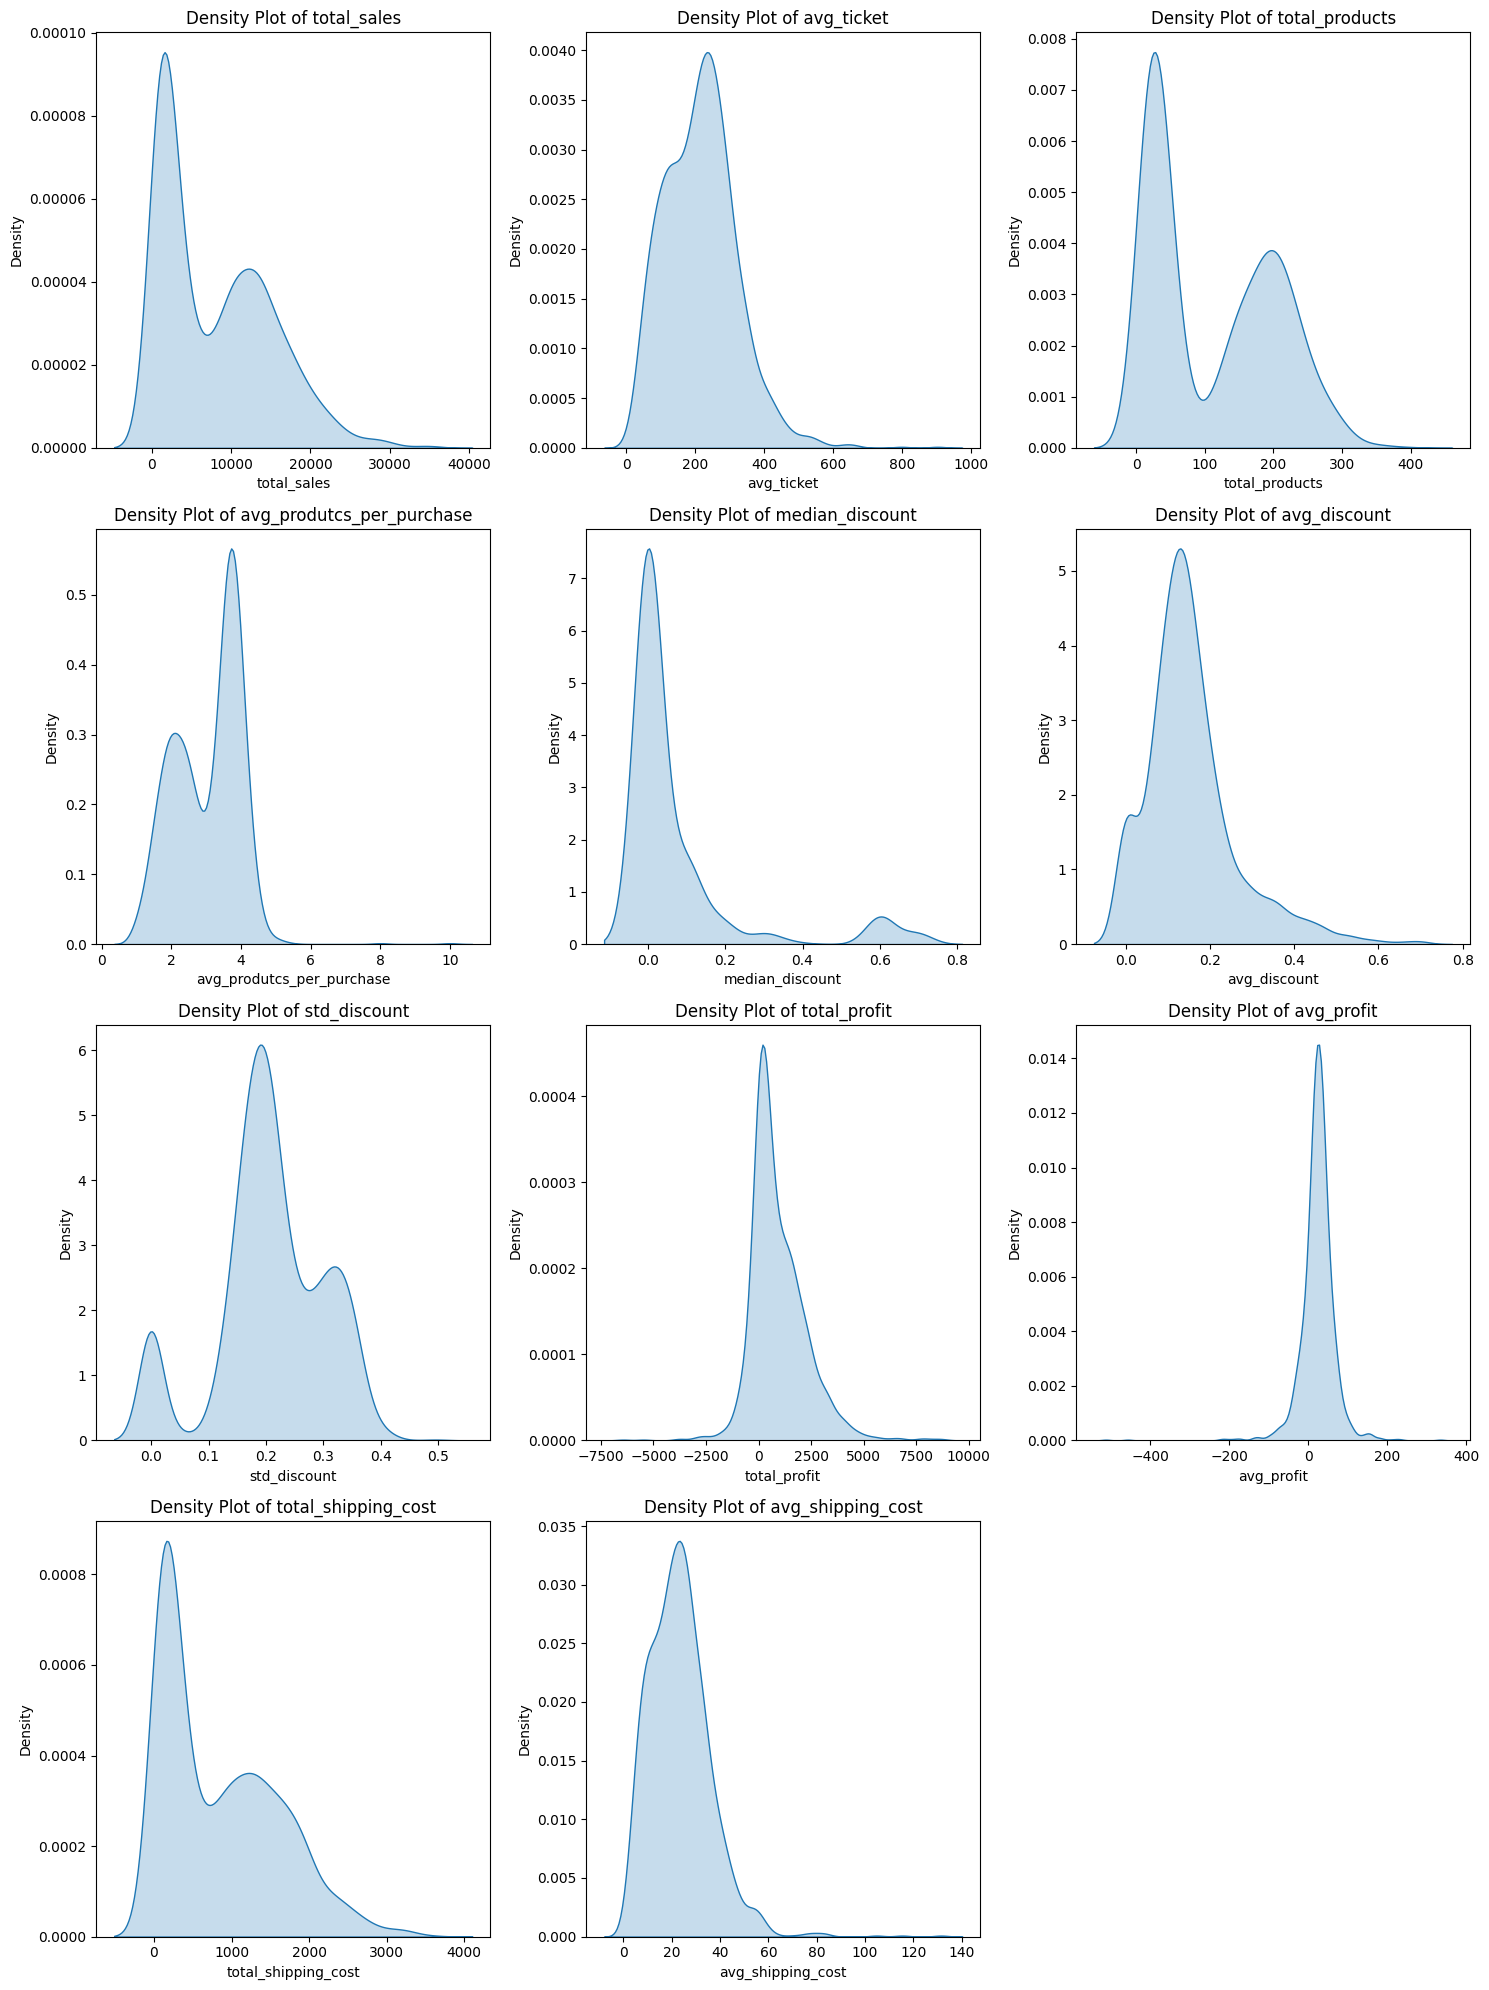

CPU times: total: 1.11 s
Wall time: 5.08 s


In [44]:
%%time
# Number of columns for the subplot grid
num_columns = 3
num_rows = (len(features) + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(15, num_rows * 5))

# Create a density plot for each continuous feature
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.kdeplot(df_customer_abt[feature].dropna(), fill=True)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

#### Hexbin Plots

Visualize the density of data points in 2D space, especially useful for large datasets to identify dense and sparse regions.

Regions with high density may indicate potential clusters.    
If dense regions and sparse regions are identified, you might decide to use density-based clustering methods like DBSCAN.

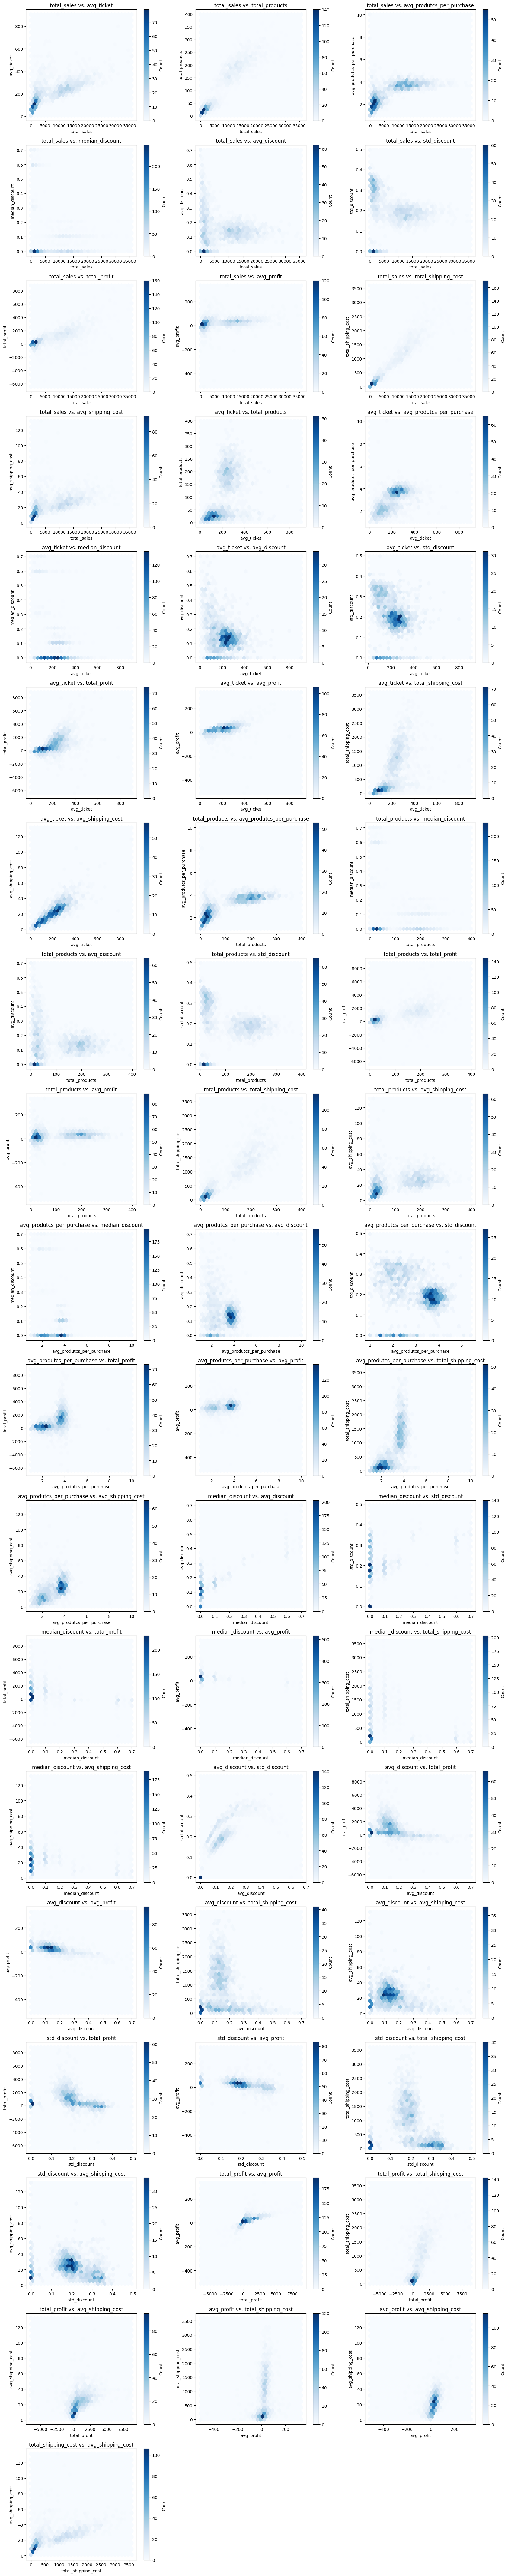

CPU times: total: 422 ms
Wall time: 7.37 s


In [47]:
%%time
# Number of columns for the subplot grid
num_columns = 3
num_rows = (len(features) * (len(features) - 1) // 2 + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(17, num_rows * 4.5))

# Create a hexbin plot for each pair of continuous features
plot_index = 1
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.subplot(num_rows, num_columns, plot_index)
        plt.hexbin(df_customer_abt[features[i]], df_customer_abt[features[j]], gridsize=30, cmap='Blues')
        plt.colorbar(label='Count')
        plt.title(f'{features[i]} vs. {features[j]}')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plot_index += 1

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

### Summary and Insights

Document key insights and observations from the EDA process, including patterns, trends, and potential issues.

Summarized insights will guide the selection of the most suitable clustering algorithm based on the data's characteristics.